In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yaml, argparse
from PIL import Image


from utils.plots import plot_images
from utils.datasets import create_dataloader
from utils.general import check_file, check_requirements, check_dataset, colorstr

In [2]:
parser = argparse.ArgumentParser(prog='test.py')
parser.add_argument('--weights', nargs='+', type=str, default='yolov5s.pt', help='model.pt path(s)')
parser.add_argument('--data', type=str, default='data/coco128.yaml', help='*.data path')
parser.add_argument('--hyp', type=str, default='data/hyp.scratch.yaml', help='hyperparameters path')
parser.add_argument('--batch-size', type=int, default=32, help='size of each image batch')
parser.add_argument('--img-size', type=int, default=640, help='inference size (pixels)')
parser.add_argument('--conf-thres', type=float, default=0.001, help='object confidence threshold')
parser.add_argument('--iou-thres', type=float, default=0.6, help='IOU threshold for NMS')
parser.add_argument('--task', default='val', help="'val', 'test', 'study'")
parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
parser.add_argument('--single-cls', action='store_true', help='treat as single-class dataset')
parser.add_argument('--augment', action='store_true', help='augmented inference')
parser.add_argument('--verbose', action='store_true', help='report mAP by class')
parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
parser.add_argument('--save-hybrid', action='store_true', help='save label+prediction hybrid results to *.txt')
parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
parser.add_argument('--save-json', action='store_true', help='save a cocoapi-compatible JSON results file')
parser.add_argument('--project', default='runs/test', help='save to project/name')
parser.add_argument('--name', default='exp', help='save to project/name')
parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')

opt = parser.parse_args([])

with open(opt.hyp) as f:
    hyp = yaml.load(f, Loader=yaml.SafeLoader)  # load hyps

In [3]:
data = check_file('sunrgbd.yaml')
check_requirements()

with open(data) as f:
    data = yaml.load(f, Loader=yaml.SafeLoader)  # model dict
check_dataset(data)  # check

nc = 1 if opt.single_cls else int(data['nc'])
if 'img_suffix' in data:
    img_suffix = data['img_suffix']
else:
    img_suffix = 'image'
if 'label_suffix' in data:
    label_suffix = data['label_suffix']
else:
    label_suffix = 'label'
if 'depth_suffix' in data:
    depth_suffix = data['depth_suffix']
else:
    depth_suffix = 'label'

# check
if 'void_classes' in data:
    void_classes = [int(i) for i in data['void_classes']]
else:
    void_classes = []
if 'valid_classes' in data:
    valid_classes = [int(i) for i in data['valid_classes']]
else:
    valid_classes = range(nc)
if 'root' in data:
    root = data['root']
else:
    root = ''

path = data['train']
dataloader, dataset = create_dataloader(path, 640, 32, 3, opt, root=root, hyp=hyp, augment=False, prefix=colorstr('train: '),
                                        img_suffix=img_suffix, label_suffix=label_suffix, depth_suffix=depth_suffix,
                                        void_classes=void_classes, valid_classes=valid_classes, dataset=data['dataset'])

100%|██████████| 1114/1114 [00:09<00:00, 114.15it/s]
train: Scanning 'datasets/SUNRGBD/image_list_train.cache' for images and labels... 0 found, 1114 missing, 0 empty, 0 corrupted: 100%|██████████| 1114/1114 [00:00<?, ?it/s]

0 unloadable images removed


In [7]:
names = [data['names'][i] for i in valid_classes]

for img, targets, paths, shapes in dataloader:
    img = img[:, 1:,:,:]
    mosaic = plot_images(img, targets, names=names)
    plt.figure()
    plt.imshow(mosaic.astype(np.uint8))
    plt.show()
    break

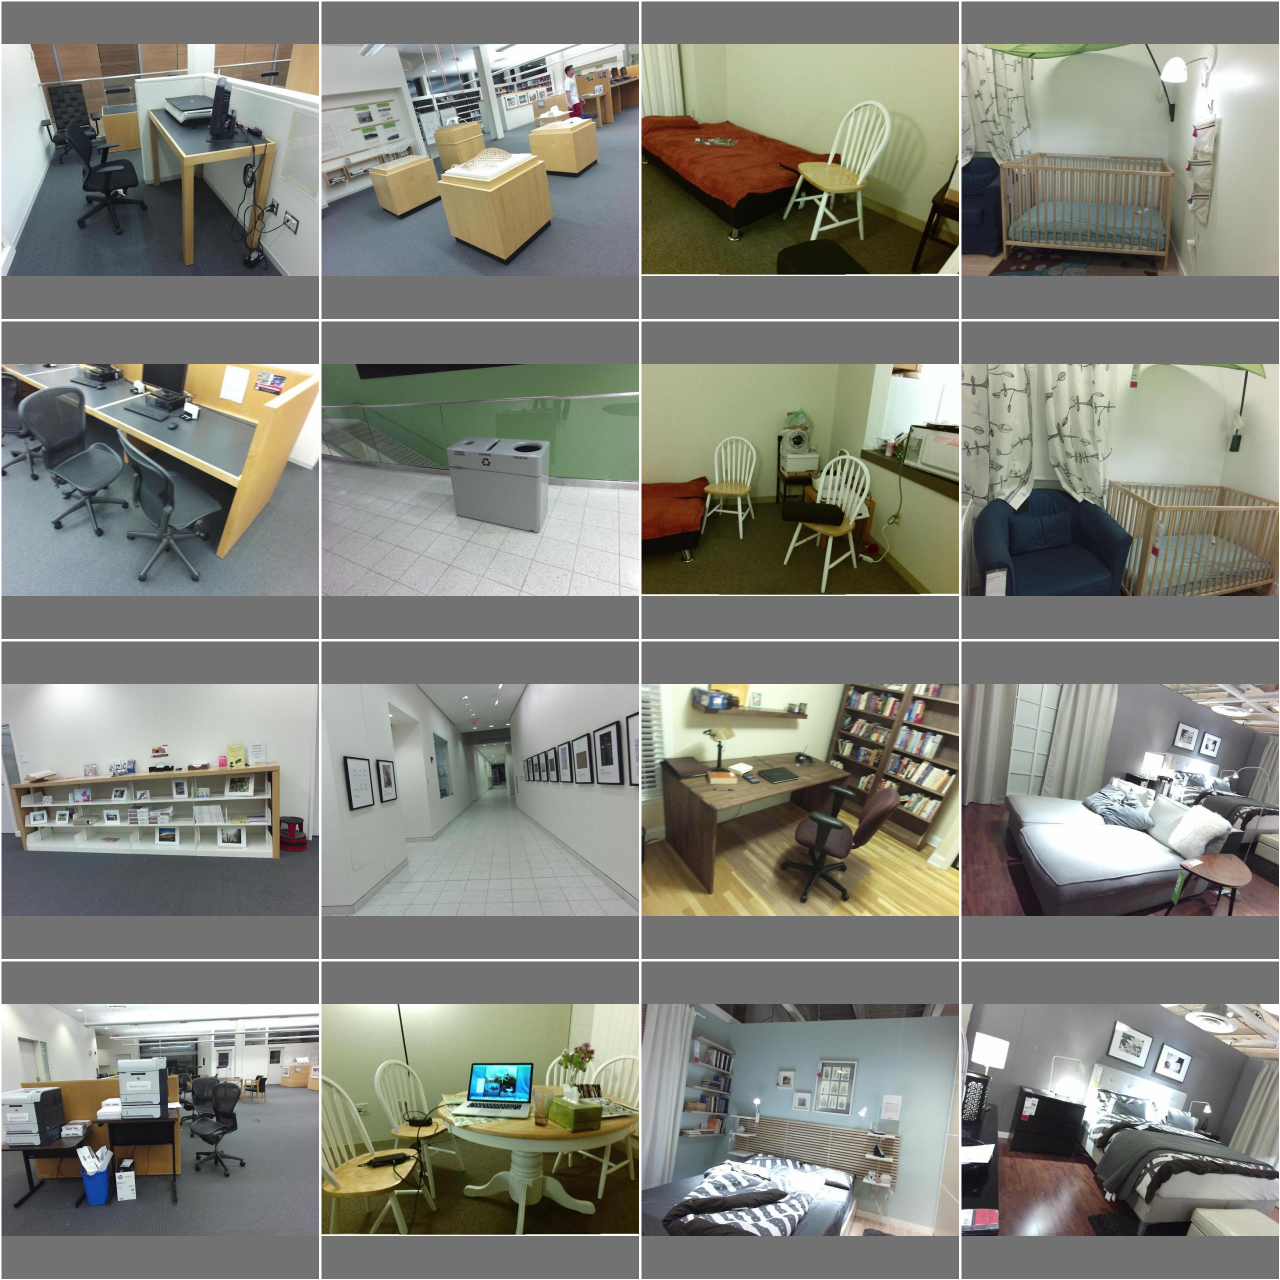

In [8]:
Image.fromarray(mosaic.astype(np.uint8))

In [6]:
names

['cabinet',
 'bed',
 'chair',
 'sofa',
 'table',
 'door',
 'window',
 'bookshelf',
 'picture',
 'counter',
 'blinds',
 'desk',
 'shelves',
 'curtain',
 'dresser',
 'pillow',
 'mirror',
 'floor_mat',
 'clothes',
 'ceiling',
 'books',
 'fridge',
 'tv',
 'paper',
 'towel',
 'shower_curtain',
 'box',
 'whiteboard',
 'person',
 'night_stand',
 'toilet',
 'sink',
 'lamp',
 'bathtub',
 'bag']